In [ ]:
from google.colab import drive
drive.mount('/content/Splitdataset0101')

Mounted at /content/Splitdataset0101


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.6 MB/s eta 0:00:00


In [ ]:


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
from glob import glob
import imageio
from sklearn.preprocessing import LabelBinarizer
import shutil
from tensorflow.keras.models import load_model
import optuna
from keras.applications import NASNetMobile
from re import VERBOSE
import gc
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
#from tensorflow.keras.applications import MobileNetV2
#from sklearn.model_selection import train_test_split
import optuna
#from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import optuna.visualization as optuna_viz



In [ ]:
pip install optuna matplotlib

In [ ]:


# Replace '/content/drive/MyDrive/Dataset/train_dataset' with your actual train path
source_path = '/content/Splitdataset0101/MyDrive/train_dataset'
destination_path = '/content/local_train_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)


'/content/local_train_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/valid_dataset'
destination_path = '/content/local_Valid_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_Valid_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/test_dataset'
destination_path = '/content/local_test_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_test_dataset'

In [ ]:
# all train class names...
train_dir = sorted(os.listdir('/content/local_train_dataset'))
class_names_lst = [dir_name for dir_name in train_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
test_dir = sorted(os.listdir('/content/local_test_dataset'))
class_names_lst = [dir_name for dir_name in test_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
val_dir = sorted(os.listdir('/content/local_Valid_dataset'))
class_names_lst = [dir_name for dir_name in val_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
data_path = '/content/'
train_dir = os.path.join(data_path,'local_train_dataset')
test_dir = os.path.join(data_path, 'local_test_dataset')
val_dir = os.path.join(data_path, 'local_Valid_dataset')

In [ ]:
images_path= os.path.join(train_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
train_images = []
train_labels = []
for i in images:
    train_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    train_labels.append(i.split('/')[-2])
train_X = np.asarray(train_images)
train_Y = pd.DataFrame(train_labels)

In [ ]:
images_path= os.path.join(val_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
valid_images = []
valid_labels = []
for i in images:
    valid_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    valid_labels.append(i.split('/')[-2])
valid_X = np.asarray(valid_images)
valid_Y = pd.DataFrame(valid_labels)

In [ ]:
images_path= os.path.join(test_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
test_images = []
test_labels = []
for i in images:
    test_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    test_labels.append(i.split('/')[-2])
test_X = np.asarray(test_images)
test_Y = pd.DataFrame(test_labels)

In [ ]:
# Get a list of subdirectories (categories) in the train path
categories = [category for category in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, category))]

# Initialize total count
total_images = 0

# Print the count of images in each category and accumulate the total count
for category in categories:
    category_path = os.path.join(source_path, category)
    num_images = len(os.listdir(category_path))
    total_images += num_images
    print(f"Category: {category}, Number of Images: {num_images}")

# Print the total count of images across all categories
print(f"\nTotal Number of Images Across All Categories: {total_images}")

Category: Shepherd’s Purse, Number of Images: 29
Category: Loose Silky-bent, Number of Images: 78
Category: Scentless Mayweed, Number of Images: 62
Category: Common wheat, Number of Images: 23
Category: Common Chickweed, Number of Images: 66
Category: Charlock, Number of Images: 50
Category: Sugar beet, Number of Images: 54
Category: Maize, Number of Images: 18
Category: Fat Hen, Number of Images: 51
Category: Small-flowered Cranesbill, Number of Images: 51
Category: Cleavers, Number of Images: 31
Category: Black-grass, Number of Images: 41

Total Number of Images Across All Categories: 554


In [ ]:
test_Y

,0
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
549,Scentless Mayweed
550,Scentless Mayweed
551,Scentless Mayweed
552,Scentless Mayweed


In [ ]:
train_Y.rename(columns={0:'species'},inplace=True)
_, train_count = np.unique(train_Y,return_counts=True)
train_df = pd.DataFrame(data = train_count)
a = train_Y['species'].unique()
a = a.tolist()
a.sort()
train_df['Index'] = a
train_df.columns = ['Train','Name']
train_df

,Train,Name
0,212,Black-grass
1,323,Charlock
2,252,Cleavers
3,541,Common Chickweed
4,177,Common wheat
5,387,Fat Hen
6,556,Loose Silky-bent
7,189,Maize
8,414,Scentless Mayweed
9,187,Shepherd’s Purse


In [ ]:
y_train = LabelBinarizer().fit_transform(train_Y.species)
train_label = np.array(y_train,dtype=np.float32)
train_label

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
valid_Y.rename(columns={0:'species'},inplace=True)
_, valid_count = np.unique(valid_Y,return_counts=True)
valid_df = pd.DataFrame(data = valid_count)
a = valid_Y['species'].unique()
a = a.tolist()
a.sort()
valid_df['Index'] = a
valid_df.columns = ['Valid','Name']
valid_df

,Valid,Name
0,56,Black-grass
1,79,Charlock
2,52,Cleavers
3,106,Common Chickweed
4,53,Common wheat
5,100,Fat Hen
6,128,Loose Silky-bent
7,50,Maize
8,131,Scentless Mayweed
9,58,Shepherd’s Purse


In [ ]:
y_valid = LabelBinarizer().fit_transform(valid_Y.species)
valid_label = np.array(y_valid,dtype=np.float32)
valid_label

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_Y.rename(columns={0:'species'},inplace=True)
_, test_count = np.unique(test_Y,return_counts=True)
test_df = pd.DataFrame(data = test_count)
a = test_Y['species'].unique()
a = a.tolist()
a.sort()
test_df['Index'] = a
test_df.columns = ['Test','Name']
test_df

,Test,Name
0,41,Black-grass
1,50,Charlock
2,31,Cleavers
3,66,Common Chickweed
4,23,Common wheat
5,51,Fat Hen
6,78,Loose Silky-bent
7,18,Maize
8,62,Scentless Mayweed
9,29,Shepherd’s Purse


In [ ]:
y_test = LabelBinarizer().fit_transform(test_Y.species)
test_label = np.array(y_test,dtype=np.float32)
test_label

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train = train_X.astype('float32') / 255
X_test = test_X.astype('float32') / 255
X_valid = valid_X.astype('float32') / 255

### NASNetMobile

# **TEST HYPER PARAMETER OPTIMIZATION**

In [ ]:

# Define the search space
def objective(trial):


    base_model = NASNetMobile(include_top=False, weights='imagenet',  input_shape=(224, 224, 3), pooling='avg')
    base_model.trainable = False



    # Create a new model and set EfficientNetB2 as its input
    model = Sequential()
    model.add(base_model)
    #model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))

    # Dropout rate
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    model.add(Dropout(rate=dropout_rate))

    model.add(Dense(12, activation='softmax'))

    # Choose the optimizer based on the hyperparameter
    optimizer_name = trial.suggest_categorical('optimizer', ['sgd', 'adam', 'rmsprop'])
    if optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=trial.suggest_float('learning_rate_sgd', 1e-3, 1e-1))
    elif optimizer_name == 'adam':
        optimizer = Adam(learning_rate=trial.suggest_float('learning_rate_adam', 1e-3, 1e-1))
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=trial.suggest_float('learning_rate_rmsprop', 1e-3, 1e-1))

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Number of epochs
    epochs = trial.suggest_int('epochs', 25, 100)

    # Batch size
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])



    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

     # Create a ModelCheckpoint callback to save the best model
    checkpoint_path = '/content/best_model1.h5'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max')

    datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        )

    datagen.fit(X_train)
    datagen.fit(X_valid)

    # Train the model
    model.fit(datagen.flow(X_train, train_label, batch_size=batch_size), epochs=epochs,
          validation_data=datagen.flow(X_valid, valid_label), callbacks=[early_stopping, checkpoint], verbose=0)


    # Evaluate on the Validation set
    val_loss, val_accuracy = model.evaluate(X_valid, valid_label)

    # Evaluate on the Test set
    test_loss, test_accuracy = model.evaluate(X_test, test_label)

    # Garbage collection
    gc.collect()

    # Return the validation loss as the objective to minimize
    return val_accuracy

# Perform hyperparameter optimization with Optuna
study_save_path = 'sqlite:////content/optuna_study.db'
study = optuna.create_study(direction='maximize', storage=study_save_path)
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)


[I 2024-01-08 18:25:07,646] A new study created in RDB with name: no-name-3fb642e3-d10a-41a9-9670-09f7980e2cf8


18/18 [==============================] - 1s 29ms/step - loss: 2.4277 - accuracy: 0.1191


[I 2024-01-08 18:29:51,976] Trial 0 finished with value: 0.10631895810365677 and parameters: {'dropout_rate': 0.4524644074833808, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.09704522414192308, 'epochs': 60, 'batch_size': 32}. Best is trial 0 with value: 0.10631895810365677.


18/18 [==============================] - 1s 30ms/step - loss: 1.0011 - accuracy: 0.6570


[I 2024-01-08 18:41:28,339] Trial 1 finished with value: 0.6168505549430847 and parameters: {'dropout_rate': 0.47801880055822027, 'optimizer': 'adam', 'learning_rate_adam': 0.016170135968365418, 'epochs': 65, 'batch_size': 64}. Best is trial 1 with value: 0.6168505549430847.


18/18 [==============================] - 1s 29ms/step - loss: 0.9535 - accuracy: 0.6679


[I 2024-01-08 18:53:42,332] Trial 2 finished with value: 0.6559678912162781 and parameters: {'dropout_rate': 0.40226078072723315, 'optimizer': 'adam', 'learning_rate_adam': 0.009272985487891194, 'epochs': 26, 'batch_size': 32}. Best is trial 2 with value: 0.6559678912162781.


18/18 [==============================] - 1s 30ms/step - loss: 0.7369 - accuracy: 0.7274


[I 2024-01-08 19:08:47,356] Trial 3 finished with value: 0.7121363878250122 and parameters: {'dropout_rate': 0.4928511675110124, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09390998316174656, 'epochs': 87, 'batch_size': 128}. Best is trial 3 with value: 0.7121363878250122.


18/18 [==============================] - 1s 30ms/step - loss: 2.3852 - accuracy: 0.1986


[I 2024-01-08 19:12:45,272] Trial 4 finished with value: 0.19658976793289185 and parameters: {'dropout_rate': 0.25435427923105264, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.05833366321072995, 'epochs': 25, 'batch_size': 128}. Best is trial 3 with value: 0.7121363878250122.


18/18 [==============================] - 1s 29ms/step - loss: 0.6224 - accuracy: 0.7563


[I 2024-01-08 19:24:08,276] Trial 5 finished with value: 0.7522567510604858 and parameters: {'dropout_rate': 0.42050206451196526, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07816229920574672, 'epochs': 57, 'batch_size': 32}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 30ms/step - loss: 1.2405 - accuracy: 0.5830


[I 2024-01-08 19:31:21,313] Trial 6 finished with value: 0.5717151165008545 and parameters: {'dropout_rate': 0.21144334082008043, 'optimizer': 'adam', 'learning_rate_adam': 0.02316298238725701, 'epochs': 62, 'batch_size': 32}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 29ms/step - loss: 2.4190 - accuracy: 0.1408


[I 2024-01-08 19:37:53,301] Trial 7 finished with value: 0.12838515639305115 and parameters: {'dropout_rate': 0.3428008762631338, 'optimizer': 'adam', 'learning_rate_adam': 0.09309206838521207, 'epochs': 72, 'batch_size': 128}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 29ms/step - loss: 0.7778 - accuracy: 0.7256


[I 2024-01-08 20:04:03,917] Trial 8 finished with value: 0.7011033296585083 and parameters: {'dropout_rate': 0.3066085948497113, 'optimizer': 'sgd', 'learning_rate_sgd': 0.0234833902624268, 'epochs': 71, 'batch_size': 128}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 29ms/step - loss: 2.4329 - accuracy: 0.1408


[I 2024-01-08 20:07:56,329] Trial 9 finished with value: 0.12838515639305115 and parameters: {'dropout_rate': 0.31924717254192914, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.06677158877840944, 'epochs': 88, 'batch_size': 32}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 31ms/step - loss: 0.7704 - accuracy: 0.7202


[I 2024-01-08 20:19:29,015] Trial 10 finished with value: 0.6920762062072754 and parameters: {'dropout_rate': 0.4053576765562971, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07843192315598102, 'epochs': 44, 'batch_size': 64}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 30ms/step - loss: 0.6881 - accuracy: 0.7310


[I 2024-01-08 20:39:41,354] Trial 11 finished with value: 0.7201604843139648 and parameters: {'dropout_rate': 0.4959479310464209, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09632571091478585, 'epochs': 100, 'batch_size': 128}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 30ms/step - loss: 0.6433 - accuracy: 0.7653


[I 2024-01-08 21:02:27,745] Trial 12 finished with value: 0.7492477297782898 and parameters: {'dropout_rate': 0.42669294570276395, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09836882166834972, 'epochs': 95, 'batch_size': 128}. Best is trial 5 with value: 0.7522567510604858.


18/18 [==============================] - 1s 31ms/step - loss: 0.5712 - accuracy: 0.7942


[I 2024-01-08 21:18:00,264] Trial 13 finished with value: 0.7632898688316345 and parameters: {'dropout_rate': 0.4083533862985652, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06152999703663258, 'epochs': 47, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.6476 - accuracy: 0.7581


[I 2024-01-08 21:39:22,617] Trial 14 finished with value: 0.7542628049850464 and parameters: {'dropout_rate': 0.3786432225404497, 'optimizer': 'sgd', 'learning_rate_sgd': 0.0556819705436852, 'epochs': 45, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.7049 - accuracy: 0.7238


[I 2024-01-08 21:49:55,700] Trial 15 finished with value: 0.7191574573516846 and parameters: {'dropout_rate': 0.3795239103271142, 'optimizer': 'sgd', 'learning_rate_sgd': 0.04910077504948159, 'epochs': 42, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 29ms/step - loss: 0.7151 - accuracy: 0.7347


[I 2024-01-08 22:03:48,027] Trial 16 finished with value: 0.6990972757339478 and parameters: {'dropout_rate': 0.36456612627384133, 'optimizer': 'sgd', 'learning_rate_sgd': 0.050778294566270726, 'epochs': 43, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.6246 - accuracy: 0.7996


[I 2024-01-08 22:16:02,604] Trial 17 finished with value: 0.7492477297782898 and parameters: {'dropout_rate': 0.29409988436213935, 'optimizer': 'sgd', 'learning_rate_sgd': 0.05045112108456033, 'epochs': 36, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 31ms/step - loss: 0.6141 - accuracy: 0.7653


[I 2024-01-08 22:44:37,387] Trial 18 finished with value: 0.7452356815338135 and parameters: {'dropout_rate': 0.45092157730862803, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03018962278449466, 'epochs': 52, 'batch_size': 64}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.6187 - accuracy: 0.7834


[I 2024-01-08 22:57:43,509] Trial 19 finished with value: 0.7552657723426819 and parameters: {'dropout_rate': 0.3406478263603593, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.0016853461897413935, 'epochs': 50, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 31ms/step - loss: 0.7437 - accuracy: 0.7310


[I 2024-01-08 23:05:48,127] Trial 20 finished with value: 0.6990972757339478 and parameters: {'dropout_rate': 0.2715703818180186, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.002724680028873605, 'epochs': 35, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.7766 - accuracy: 0.7292


[I 2024-01-08 23:12:12,516] Trial 21 finished with value: 0.700100302696228 and parameters: {'dropout_rate': 0.33872807367166285, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.0013991428807381327, 'epochs': 51, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 29ms/step - loss: 2.4241 - accuracy: 0.1408


[I 2024-01-08 23:18:36,650] Trial 22 finished with value: 0.12838515639305115 and parameters: {'dropout_rate': 0.38080448265437467, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.030479657283410642, 'epochs': 51, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 29ms/step - loss: 2.4224 - accuracy: 0.1408


[I 2024-01-08 23:25:50,156] Trial 23 finished with value: 0.12838515639305115 and parameters: {'dropout_rate': 0.3651748804681155, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.030606373067683913, 'epochs': 35, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.8147 - accuracy: 0.6949


[I 2024-01-08 23:52:19,798] Trial 24 finished with value: 0.6900702118873596 and parameters: {'dropout_rate': 0.33626003694964396, 'optimizer': 'sgd', 'learning_rate_sgd': 0.003728366434853185, 'epochs': 47, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 31ms/step - loss: 1.8518 - accuracy: 0.3051


[I 2024-01-09 00:01:24,515] Trial 25 finished with value: 0.2878635823726654 and parameters: {'dropout_rate': 0.38390249793597625, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.02862458494630552, 'epochs': 68, 'batch_size': 64}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.6874 - accuracy: 0.7527


[I 2024-01-09 00:13:40,867] Trial 26 finished with value: 0.7271815538406372 and parameters: {'dropout_rate': 0.43402469645922986, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06735383248617952, 'epochs': 78, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 0.7223 - accuracy: 0.7347


[I 2024-01-09 00:27:35,576] Trial 27 finished with value: 0.7251754999160767 and parameters: {'dropout_rate': 0.4008547789748829, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06996200367450406, 'epochs': 54, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 2.4341 - accuracy: 0.1191


[I 2024-01-09 00:32:21,013] Trial 28 finished with value: 0.10631895810365677 and parameters: {'dropout_rate': 0.3580583955934639, 'optimizer': 'adam', 'learning_rate_adam': 0.08203430299973358, 'epochs': 39, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 2.4284 - accuracy: 0.1173


[I 2024-01-09 00:37:05,915] Trial 29 finished with value: 0.10531594604253769 and parameters: {'dropout_rate': 0.3218376712073583, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.08005139735078079, 'epochs': 30, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 31ms/step - loss: 1.2423 - accuracy: 0.4910


[I 2024-01-09 00:46:11,134] Trial 30 finished with value: 0.4964894652366638 and parameters: {'dropout_rate': 0.4695753920585266, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.01757720026866704, 'epochs': 47, 'batch_size': 64}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 31ms/step - loss: 0.7172 - accuracy: 0.7545


[I 2024-01-09 00:58:27,547] Trial 31 finished with value: 0.7311936020851135 and parameters: {'dropout_rate': 0.42933322172347516, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06267526902155508, 'epochs': 58, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 29ms/step - loss: 0.6493 - accuracy: 0.7563


[I 2024-01-09 01:11:32,674] Trial 32 finished with value: 0.747241735458374 and parameters: {'dropout_rate': 0.41002775226114896, 'optimizer': 'sgd', 'learning_rate_sgd': 0.0775410459408846, 'epochs': 58, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 29ms/step - loss: 0.6416 - accuracy: 0.7653


[I 2024-01-09 01:24:36,086] Trial 33 finished with value: 0.7432296872138977 and parameters: {'dropout_rate': 0.452588734020963, 'optimizer': 'sgd', 'learning_rate_sgd': 0.05821949147827696, 'epochs': 57, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 29ms/step - loss: 0.7074 - accuracy: 0.7292


[I 2024-01-09 01:35:59,579] Trial 34 finished with value: 0.7101303935050964 and parameters: {'dropout_rate': 0.3934627980881731, 'optimizer': 'sgd', 'learning_rate_sgd': 0.08166192434931815, 'epochs': 63, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 30ms/step - loss: 2.4242 - accuracy: 0.1191


[I 2024-01-09 01:42:24,106] Trial 35 finished with value: 0.10631895810365677 and parameters: {'dropout_rate': 0.4161214518102975, 'optimizer': 'adam', 'learning_rate_adam': 0.05489724254263428, 'epochs': 47, 'batch_size': 32}. Best is trial 13 with value: 0.7632898688316345.


18/18 [==============================] - 1s 31ms/step - loss: 0.6083 - accuracy: 0.7581


[I 2024-01-09 02:02:11,862] Trial 36 finished with value: 0.7652958631515503 and parameters: {'dropout_rate': 0.45209338238121477, 'optimizer': 'sgd', 'learning_rate_sgd': 0.034680290756933185, 'epochs': 31, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 30ms/step - loss: 0.5954 - accuracy: 0.7780


[I 2024-01-09 02:23:39,743] Trial 37 finished with value: 0.7552657723426819 and parameters: {'dropout_rate': 0.4734797509394706, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03545506228049626, 'epochs': 32, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 31ms/step - loss: 2.4174 - accuracy: 0.1191


[I 2024-01-09 02:31:03,040] Trial 38 finished with value: 0.10631895810365677 and parameters: {'dropout_rate': 0.4750221024809326, 'optimizer': 'adam', 'learning_rate_adam': 0.0541613099225699, 'epochs': 29, 'batch_size': 64}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 30ms/step - loss: 2.4333 - accuracy: 0.1119


[I 2024-01-09 02:35:48,005] Trial 39 finished with value: 0.1313941776752472 and parameters: {'dropout_rate': 0.45443847863563036, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.045963240690767786, 'epochs': 31, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 30ms/step - loss: 0.8510 - accuracy: 0.6913


[I 2024-01-09 02:50:05,746] Trial 40 finished with value: 0.6800401210784912 and parameters: {'dropout_rate': 0.4818974360441508, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03287032728633597, 'epochs': 39, 'batch_size': 128}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 31ms/step - loss: 0.8756 - accuracy: 0.6751


[I 2024-01-09 02:59:02,205] Trial 41 finished with value: 0.6579739451408386 and parameters: {'dropout_rate': 0.43500672806517326, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03912642663316893, 'epochs': 25, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 30ms/step - loss: 0.6222 - accuracy: 0.7563


[I 2024-01-09 03:21:21,075] Trial 42 finished with value: 0.7622868418693542 and parameters: {'dropout_rate': 0.4418245063145038, 'optimizer': 'sgd', 'learning_rate_sgd': 0.021038281918687528, 'epochs': 32, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 30ms/step - loss: 0.6265 - accuracy: 0.7671


[I 2024-01-09 03:40:17,565] Trial 43 finished with value: 0.747241735458374 and parameters: {'dropout_rate': 0.4446693214688904, 'optimizer': 'sgd', 'learning_rate_sgd': 0.020363738804527607, 'epochs': 30, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 31ms/step - loss: 0.6530 - accuracy: 0.7635


[I 2024-01-09 04:01:44,872] Trial 44 finished with value: 0.7362086176872253 and parameters: {'dropout_rate': 0.4626438391799521, 'optimizer': 'sgd', 'learning_rate_sgd': 0.01235938966005613, 'epochs': 39, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 30ms/step - loss: 0.6518 - accuracy: 0.7473


[I 2024-01-09 04:15:39,467] Trial 45 finished with value: 0.7372116446495056 and parameters: {'dropout_rate': 0.48424395024493455, 'optimizer': 'sgd', 'learning_rate_sgd': 0.04269364603028, 'epochs': 32, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 31ms/step - loss: 2.0954 - accuracy: 0.2256


[I 2024-01-09 04:23:05,255] Trial 46 finished with value: 0.19157472252845764 and parameters: {'dropout_rate': 0.20519129416655157, 'optimizer': 'adam', 'learning_rate_adam': 0.073250367643231, 'epochs': 27, 'batch_size': 128}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 28ms/step - loss: 0.6749 - accuracy: 0.7671


[I 2024-01-09 04:38:39,467] Trial 47 finished with value: 0.7131394147872925 and parameters: {'dropout_rate': 0.49435678589323034, 'optimizer': 'sgd', 'learning_rate_sgd': 0.02165864535973823, 'epochs': 35, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 29ms/step - loss: 0.7138 - accuracy: 0.7238


[I 2024-01-09 04:50:04,995] Trial 48 finished with value: 0.7201604843139648 and parameters: {'dropout_rate': 0.4651000896916316, 'optimizer': 'sgd', 'learning_rate_sgd': 0.033930428720331356, 'epochs': 39, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


18/18 [==============================] - 1s 29ms/step - loss: 0.7826 - accuracy: 0.7148


[I 2024-01-09 05:00:40,221] Trial 49 finished with value: 0.7081243991851807 and parameters: {'dropout_rate': 0.44279231674378505, 'optimizer': 'sgd', 'learning_rate_sgd': 0.043023634521559245, 'epochs': 33, 'batch_size': 32}. Best is trial 36 with value: 0.7652958631515503.


Best hyperparameters: {'dropout_rate': 0.45209338238121477, 'optimizer': 'sgd', 'learning_rate_sgd': 0.034680290756933185, 'epochs': 31, 'batch_size': 32}


In [ ]:

# Assuming 'study' is your Optuna study object
# Plot optimization history
optuna_viz.plot_optimization_history(study)




In [ ]:

# Plot slice plot
optuna_viz.plot_slice(study)



In [ ]:
# Plot contour plot
optuna_viz.plot_contour(study)



In [ ]:
# Plot parameter importances
optuna_viz.plot_param_importances(study)

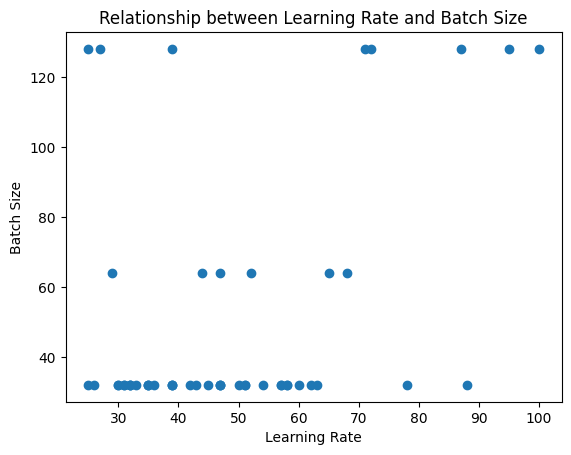

In [ ]:


# Assuming 'study' is your Optuna study object
# Get hyperparameter values for each trial
param1_values = [trial.params['epochs'] for trial in study.trials]
param2_values = [trial.params['batch_size'] for trial in study.trials]

# Scatter plot between two hyperparameters
plt.scatter(param1_values, param2_values)
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.title('Relationship between Learning Rate and Batch Size')
plt.show()

In [ ]:
import optuna.visualization as optuna_viz

optuna_viz.plot_contour(study)


In [ ]:
import optuna.visualization as optuna_viz

# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study)

# Adjust the size of the plot
contour_plot.update_layout(width=1800, height=1600)




In [ ]:

# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['epochs', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

In [ ]:
# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['dropout_rate', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

In [ ]:
# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['batch_size', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

## **Using best Hyper parameters train model**

In [ ]:
    base_model = NASNetMobile(include_top=False, weights='imagenet',  input_shape=(224, 224, 3), pooling='avg')
    base_model.trainable = False

    model = Sequential()
    model.add(base_model)

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.45209338238121477))
    model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.034680290756933185),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_hyper_model_2 100 epochs.h5",
                             monitor='val_accuracy',  # You can choose the metric to monitor (e.g., 'val_accuracy')
                             save_best_only=True,  # Save only the best model
                             mode='max',  # 'min' for loss, 'max' for accuracy, etc.
                             verbose=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        )
datagen.fit(X_train)


In [ ]:
# Train the model
history=model.fit(datagen.flow(X_train, train_label,batch_size=32) ,epochs=75,  validation_data=(X_valid, valid_label), callbacks=[checkpoint])

Epoch 1/75
125/125 [==============================] - ETA: 0s - loss: 2.0186 - accuracy: 0.3207
Epoch 1: val_accuracy improved from -inf to 0.51454, saving model to best_hyper_model_2 100 epochs.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



125/125 [==============================] - 59s 372ms/step - loss: 2.0186 - accuracy: 0.3207 - val_loss: 1.5401 - val_accuracy: 0.5145
Epoch 2/75
125/125 [==============================] - ETA: 0s - loss: 1.4566 - accuracy: 0.4975
Epoch 2: val_accuracy improved from 0.51454 to 0.56469, saving model to best_hyper_model_2 100 epochs.h5
125/125 [==============================] - 42s 334ms/step - loss: 1.4566 - accuracy: 0.4975 - val_loss: 1.2533 - val_accuracy: 0.5647
Epoch 3/75
125/125 [==============================] - ETA: 0s - loss: 1.2317 - accuracy: 0.5594
Epoch 3: val_accuracy improved from 0.56469 to 0.57172, saving model to best_hyper_model_2 100 epochs.h5
125/125 [==============================] - 42s 333ms/step - loss: 1.2317 - accuracy: 0.5594 - val_loss: 1.2488 - val_accuracy: 0.5717
Epoch 4/75
125/125 [==============================] - ETA: 0s - loss: 1.1178 - accuracy: 0.6088
Epoch 4: val_accuracy improved from 0.57172 to 0.65095, saving model to best_hyper_model_2 100 epoch

In [ ]:
model1 = load_model('best_hyper_model_2 100 epochs.h5')

In [ ]:
print(os.path.getsize("best_hyper_model_2 100 epochs.h5")/1048576, "MB")

28.200592041015625 MB


In [ ]:
loss, acc = model1.evaluate(X_test,test_label)
loss1, acc1 = model1.evaluate(X_valid,valid_label)
loss2, acc2 = model1.evaluate(datagen.flow(X_valid,valid_label))
print('Test loss:', loss,'   Test accuracy:', acc)
print('Train loss:', loss1,'   Train accuracy:',acc1)
print('Train loss:', loss2,'   Train accuracy:',acc2)

32/32 [==============================] - 14s 313ms/step - loss: 0.5525 - accuracy: 0.8175
Test loss: 0.47428056597709656    Test accuracy: 0.8086642622947693
Train loss: 0.5597863793373108    Train accuracy: 0.8134403228759766
Train loss: 0.552546501159668    Train accuracy: 0.8174523711204529


18/18 [==============================] - 5s 29ms/step


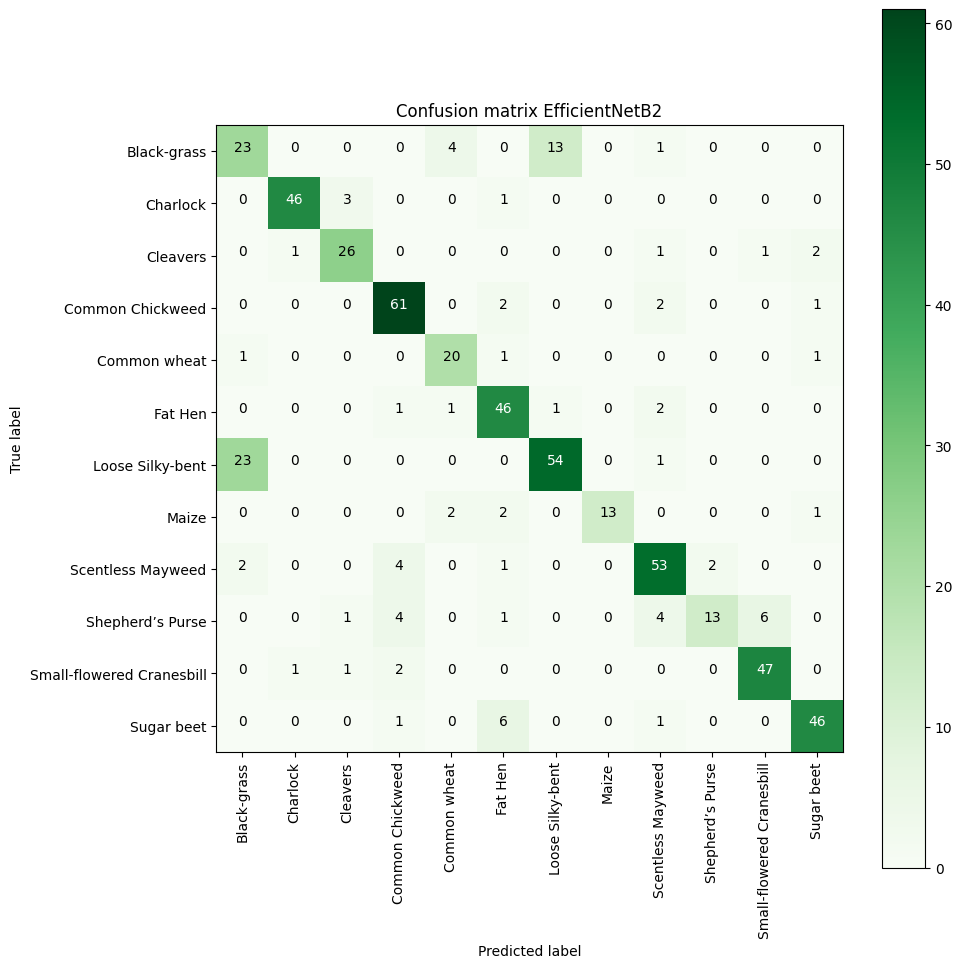

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix EfficientNetB2',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1)
trueY = np.argmax(test_label, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = class_names_lst)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.7975451671446342
0.8086642599277978
0.8071189294663837
[0.51111111 0.93877551 0.83870968 0.87769784 0.8        0.82882883
 0.73972603 0.83870968 0.83464567 0.59090909 0.8952381  0.87619048]


In [ ]:
from sklearn.metrics import classification_report

# Define your title
title = "Classification Report EfficientNetB2"

# Calculate the padding to center the title
padding_length = (80 - len(title)) // 2

# Create the formatted title with centered and bold text
formatted_title = f"\033[1;32;47m{' ' * padding_length}{title}{' ' * padding_length}\033[m"

# Print the formatted title
print(formatted_title)

print(classification_report(trueY, predYClasses, target_names=class_names_lst))

                      Classification Report EfficientNetB2                      
                           precision    recall  f1-score   support

              Black-grass       0.47      0.56      0.51        41
                 Charlock       0.96      0.92      0.94        50
                 Cleavers       0.84      0.84      0.84        31
         Common Chickweed       0.84      0.92      0.88        66
             Common wheat       0.74      0.87      0.80        23
                  Fat Hen       0.77      0.90      0.83        51
         Loose Silky-bent       0.79      0.69      0.74        78
                    Maize       1.00      0.72      0.84        18
        Scentless Mayweed       0.82      0.85      0.83        62
         Shepherd’s Purse       0.87      0.45      0.59        29
Small-flowered Cranesbill       0.87      0.92      0.90        51
               Sugar beet       0.90      0.85      0.88        54

                 accuracy                     

**Observation:**



*   Recall is very low for Black-grass.
*   Precison is below .70 for Black grass.
*   Even from Confusion matrix, we see model did not perform well for black grass.
*   Other classes have better balane between precision and recall and a goof f1 score.

Overall Accuracy is also great.





In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[487,  26],
        [ 18,  23]],

       [[502,   2],
        [  4,  46]],

       [[518,   5],
        [  5,  26]],

       [[476,  12],
        [  5,  61]],

       [[524,   7],
        [  3,  20]],

       [[489,  14],
        [  5,  46]],

       [[462,  14],
        [ 24,  54]],

       [[536,   0],
        [  5,  13]],

       [[480,  12],
        [  9,  53]],

       [[523,   2],
        [ 16,  13]],

       [[496,   7],
        [  4,  47]],

       [[495,   5],
        [  8,  46]]])

**Each plant category level TP, FP, FN, TN can be seen from above matrix:**

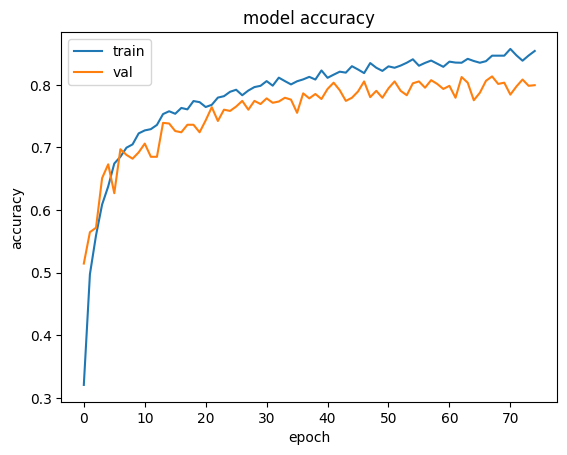

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()




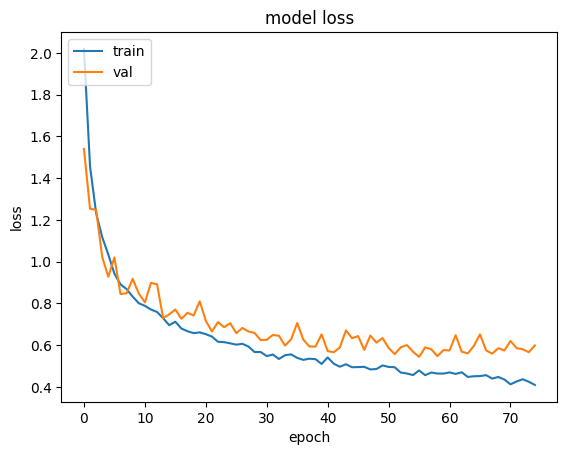

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Observation:**


*   Loss is decreasing and val loss is close to training loss
*   Accuracy of val set is also close to training accuracy
*   No overfitting or underfitting observerd based on the scores of val and testing sets





